# Customer Segmentation Practice using k-Means

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
DATAPATH = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

In [6]:
#Call the Data to the party

df = pd.read_csv(DATAPATH)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Understanding our DATA

In [7]:
df.shape

(200, 5)

In [8]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

___

## Performing Elbow Methods on Two features
- Annual Income
- Spending Score

In [15]:
X = df.iloc[:,[3,4]].values

<Axes: >

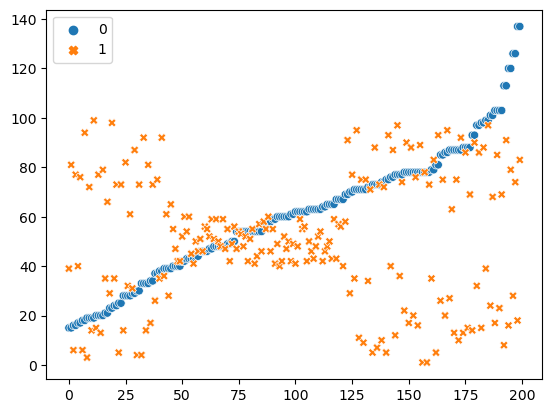

In [17]:
sns.scatterplot(X)

In [19]:
#importing cluster

from sklearn.cluster import KMeans
wcss = []  # within cluster sum of square

In [24]:
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

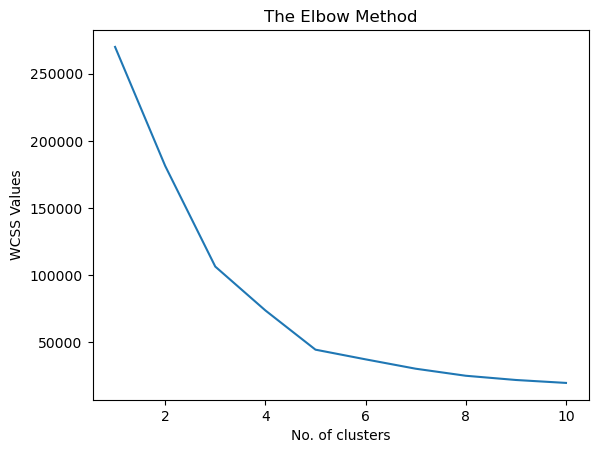

In [27]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS Values')
plt.show()

- We can say that from the Elbow Methods we will choose the k to be 5

## Training a model using unsupervised learning algorithm (K-Means)

In [28]:
kmeans_model = KMeans(n_clusters=5,random_state=42)

In [29]:
y_kmeans = kmeans_model.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


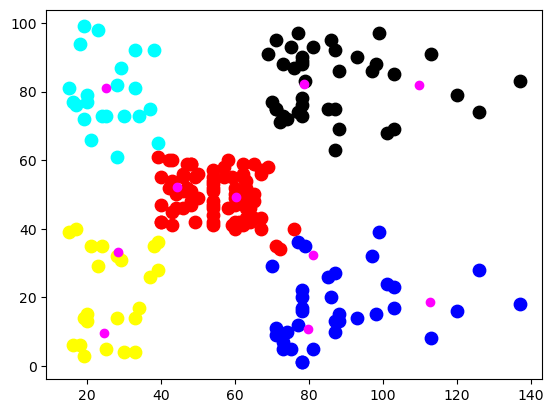

In [39]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label='Customer 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='blue',label='Customer 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='yellow',label='Customer 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='cyan',label='Customer 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='black',label='Customer 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],c='magenta')
